In [ ]:
import sys
sys.path.append('../../src/')
import schadenfreude_helper as hf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Choose paths for input data and output data
ready_path <- '../data_tmp/'
out_path <- '../out_tmp/'

In [ ]:
# Read in the production data
# This comes from package knb-lter-jrn.210349001 on EDI
df = pd.read_csv(ready_path + '/jrn349001_cover_and_biomass_juntar.csv')
# Create a categorical column for plotting
w_dict = {0.2:'-80%', 1.0:'ambient', 1.8:'+80%'}
df['PPT treatment'] = df.ppt_trt.replace(w_dict)
df = df.astype({'year':int,'plotid':str,'ppt_trt':str,'n_trt':str})
df.head()

,year,plotid,ppt_trt,n_trt,cover_grass,cover_shrub,cover_rare,cover_total,biomass_grass,biomass_shrub,biomass_rare,biomass_total,PPT treatment
0,2006,104,0.2,1,0.479427,0.106663,0.018322,0.604412,126.837137,19.691052,3.382477,149.910666,-80%
1,2006,108,0.2,0,0.395438,0.127014,0.117260,0.639712,104.617012,23.448126,21.647286,149.712424,-80%
2,2006,114,0.2,1,0.330387,0.092717,0.130431,0.553534,87.407128,17.116412,24.078834,128.602374,-80%
3,2006,126,0.2,0,0.461362,0.280259,0.197628,0.939249,122.057969,51.738546,36.484190,210.280705,-80%
4,2006,134,0.2,0,0.458539,0.036860,0.101768,0.597167,121.311130,6.804681,18.787405,146.903216,-80%


In [4]:
# Set a diverging palette
p = sns.diverging_palette(30, 250, l=65, center="dark", n=3)
sns.set_palette(p)
p

[(0.90499399934908, 0.5182704637470051, 0.3064196349089693),
 (0.13668746475015844, 0.14056792582310582, 0.14872962310788068),
 (0.4265534711840377, 0.6260975213663689, 0.9072715683943962)]

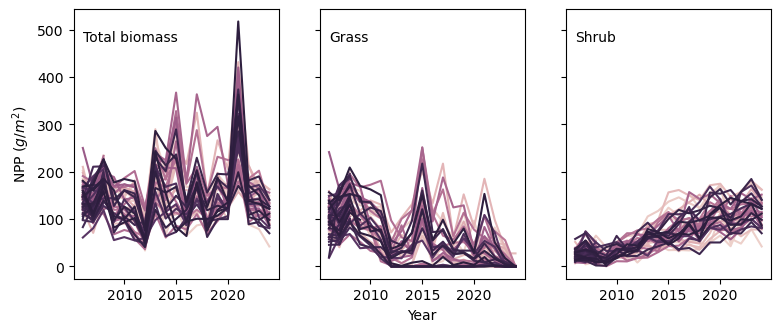

In [5]:
# Plot the ANPP data by individual plots
fig, ax = plt.subplots(1, 3, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=df, ax=ax[0], x="year", y="biomass_total",
                  hue="plotid", legend=False, estimator=None)
a2 = sns.lineplot(data=df, ax=ax[1], x="year", y="biomass_grass",
                  hue="plotid", legend=False, estimator=None)
a3 = sns.lineplot(data=df, ax=ax[2], x="year", y="biomass_shrub",
                  hue="plotid", legend=False, estimator=None)

a1.set(xlabel=None)
a1.set(ylabel="NPP ($g/m^2$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2006, 475, 'Total biomass' )
a2.text(2006, 475, 'Grass' )
a3.text(2006, 475, 'Shrub' )
#plt.tight_layout()
plt.show()

#plt.savefig(out_path + '/figs/lt_biomass_3panel.png', dpi=300, facecolor='w')

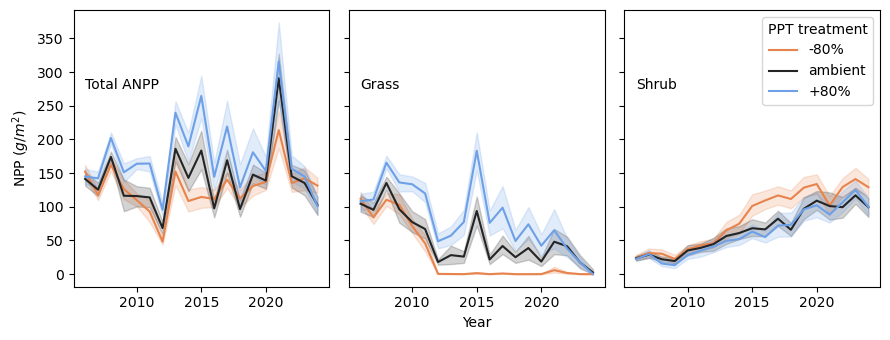

In [7]:
# Plot means
fig, ax = plt.subplots(1, 3, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=df, ax=ax[0], x="year", y="biomass_total",
                  hue="PPT treatment", errorbar=('ci', 95), legend=False)
a2 = sns.lineplot(data=df, ax=ax[1], x="year", y="biomass_grass",
                  hue="PPT treatment", errorbar=('ci', 95), legend=False)
a3 = sns.lineplot(data=df, ax=ax[2], x="year", y="biomass_shrub",
                  hue="PPT treatment", errorbar=('ci', 95))

a1.set(xlabel=None)
a1.set(ylabel="NPP ($g/m^2$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2006, 275, 'Total ANPP' )
a2.text(2006, 275, 'Grass' )
a3.text(2006, 275, 'Shrub' )
plt.tight_layout()

#plt.savefig(out_path + '/figs/lt_biomass_3panel.png', dpi=300, facecolor='w')

In [ ]:
# Calculate ppt-treatment-level mean and confidence intervals (drop wcat first)
df_means, q975, q025 = hf.ppt_trt_rel_means(df.drop('PPT treatment', axis=1))

# Re-create a categorical column for plotting
w_dict = {'0.2':'-80%', '1.0':'ambient', '1.8':'+80%'}
df_means['PPT treatment'] = df_means.ppt_trt.replace(w_dict)

In [12]:
df_means.head()

,year,ppt_trt,cover_grass,cover_shrub,cover_rare,cover_total,biomass_grass,biomass_shrub,biomass_rare,biomass_total,rbiomass_grass,rbiomass_shrub,rbiomass_total,PPT treatment
0,2006,0.2,0.422622,0.133385,0.086161,0.642168,111.808785,24.624288,15.906166,152.339239,7.257196,1.178052,10.941535,-80%
1,2006,1.0,0.395190,0.127004,0.072585,0.594779,104.551590,23.446236,13.399879,141.397705,0.000000,0.000000,0.000000,ambient
2,2006,1.8,0.409115,0.122094,0.077139,0.608349,108.235510,22.539850,14.240695,145.016056,3.683920,-0.906386,3.618351,+80%
3,2007,0.2,0.318287,0.169491,0.010680,0.498458,84.205973,31.289812,1.971568,117.467353,-11.338193,2.386272,-7.980511,-80%
4,2007,1.0,0.361144,0.156565,0.005418,0.523127,95.544166,28.903541,1.000158,125.447865,0.000000,0.000000,0.000000,ambient


In [13]:
q975.head()

,year,ppt_trt,cover_grass,cover_shrub,cover_rare,cover_total,biomass_grass,biomass_shrub,biomass_rare,biomass_total
0,2006,0.2,0.465576,0.154841,0.107930,0.686703,123.172842,28.585229,19.925008,163.229141
1,2006,1.0,0.443870,0.145956,0.095504,0.634371,117.430213,26.944908,17.631038,152.085626
2,2006,1.8,0.461988,0.139057,0.104548,0.657459,122.223638,25.671297,19.300565,157.608464
3,2007,0.2,0.360083,0.210023,0.015887,0.534378,95.263511,38.772276,2.932956,126.255254
4,2007,1.0,0.405027,0.184008,0.008219,0.563935,107.153894,33.969737,1.517329,135.979397


/var/folders/wj/7fgjbm815wl1ht4n6vcz7jlr0000gn/T/ipykernel_4638/826136925.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  a3 = sns.lineplot(data=df_means, ax=ax[2], x="year", y="rbiomass_shrub",


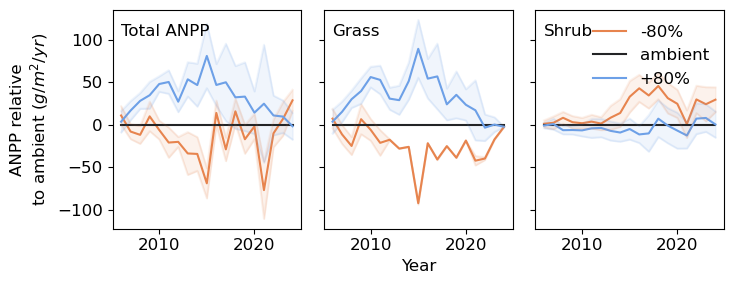

In [14]:
plt.rcParams.update({'font.size':12})

# Function to add confidence intervals
def get_r_ci(var, ax):
    lowerval = df_means[var] - q025[var]
    lower1 = df_means.loc[df_means.ppt_trt=='0.2','r'+var] - lowerval[df_means.ppt_trt=='0.2']
    #lower3 = df_means.loc[df_means.ppt_trt=='1.0','r'+var] - lowerval[df_means.ppt_trt=='1.0']
    lower5 = df_means.loc[df_means.ppt_trt=='1.8','r'+var] - lowerval[df_means.ppt_trt=='1.8']
    ax.plot(df_means.year[df_means.ppt_trt=='0.2'], lower1, color=p[0], alpha=0.1)
    #ax.plot(df_means.year[df_means.ppt_trt=='1.0'], lower3, color=p[1], alpha=0.1)
    ax.plot(df_means.year[df_means.ppt_trt=='1.8'], lower5, color=p[2], alpha=0.1)
    upperval = q975[var] - df_means[var]
    upper1 = df_means.loc[df_means.ppt_trt=='0.2','r'+var] + upperval[df_means.ppt_trt=='0.2']
    #upper3 = df_means.loc[df_means.ppt_trt=='1.0','r'+var] + upperval[df_means.ppt_trt=='1.0']
    upper5 = df_means.loc[df_means.ppt_trt=='1.8','r'+var] + upperval[df_means.ppt_trt=='1.8']
    ax.plot(df_means.year[df_means.ppt_trt=='0.2'], upper1, color=p[0], alpha=0.1)
    #ax.plot(df_means.year[df_means.ppt_trt=='1.0'], upper3, color=p[1], alpha=0.1)
    ax.plot(df_means.year[df_means.ppt_trt=='1.8'], upper5, color=p[2], alpha=0.1)
    ax.fill_between(df_means.year[df_means.ppt_trt=='0.2'], lower1, upper1,
                    color=p[0], alpha=0.1)
    #ax.fill_between(df_means.year[df_means.ppt_trt=='1.0'], lower3, upper3,
    #                color=p[1], alpha=0.1)
    ax.fill_between(df_means.year[df_means.ppt_trt=='1.8'], lower5, upper5,
                    color=p[2], alpha=0.1)

#def getrupper(var)
#upper = q975['biomass_total'] - means['biomass_total']

fig, ax = plt.subplots(1, 3, figsize=(7.5,3.0), sharey=True)
a1 = sns.lineplot(data=df_means, ax=ax[0], x="year", y="rbiomass_total",
                  hue="PPT treatment", legend=False)
get_r_ci("biomass_total", a1)
a2 = sns.lineplot(data=df_means, ax=ax[1], x="year", y="rbiomass_grass",
                  hue="PPT treatment", legend=False)
get_r_ci("biomass_grass", a2)
a3 = sns.lineplot(data=df_means, ax=ax[2], x="year", y="rbiomass_shrub",
                  hue="PPT treatment", ci=95)
get_r_ci("biomass_shrub", a3)
a1.set(xlabel=None)
a1.set(ylabel="ANPP relative\nto ambient ($g/m^2/yr$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2006, 105, 'Total ANPP' )
a2.text(2006, 105, 'Grass' )
a3.text(2006, 105, 'Shrub' )
plt.legend(loc='upper right', framealpha=0.0)
plt.tight_layout()

#plt.savefig(out_path + '/figs/lt_relbiomass_3panel_largefont.jpg', dpi=400, facecolor='w')

In [ ]:
# Load precipitation data
# This comes from package knb-lter-jrn.210349002 on EDI
ppt = pd.read_csv(ready_path + '/seasonal_ppt_juntar.csv')
# Create a categorical column for plotting
w_dict = {0.2:'-80%', 1.0:'ambient', 1.8:'+80%'}
ppt['PPT treatment'] = ppt.ppt_trt.replace(w_dict)
# Split the seasons
gs_ppt = ppt.loc[ppt.season=='growing_season',:]
ann_ppt = ppt.loc[ppt.season=='annual',:]

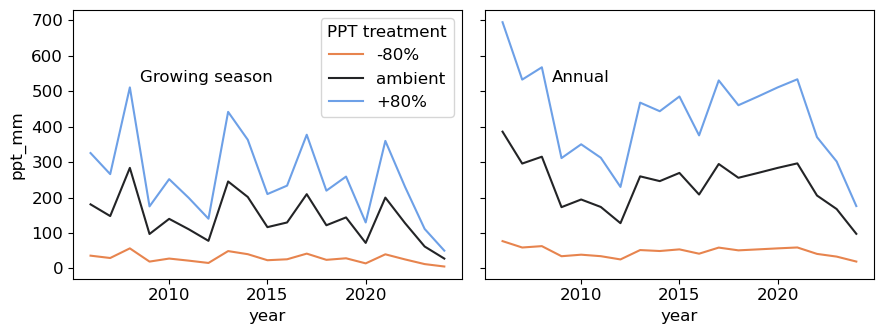

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=gs_ppt, ax=ax[0], x="year", y="ppt_mm",
                  hue="PPT treatment", legend=True)
a2 = sns.lineplot(data=ann_ppt, ax=ax[1], x="year", y="ppt_mm",
                  hue="PPT treatment", legend=False)
a1.text(2008.5, 525, 'Growing season' )
a2.text(2008.5, 525, 'Annual' )
plt.tight_layout()

#plt.savefig(out_path + '/figs/lt_precip.png', dpi=300, facecolor='w')

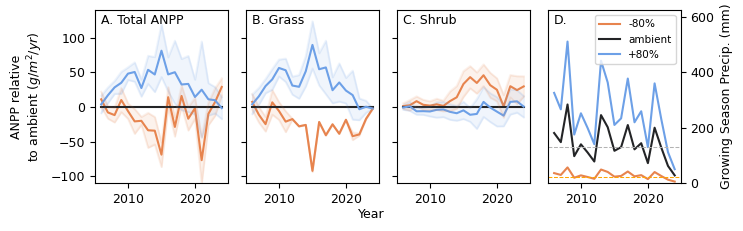

In [18]:
plt.rcParams.update({'font.size':9})
fig, ax = plt.subplots(1, 4, figsize=(7.5,2.25))
a1 = sns.lineplot(data=df_means, ax=ax[0], x="year", y="rbiomass_total",
                  hue="PPT treatment", legend=False)
a1.set_ylim(-110, 140)
get_r_ci("biomass_total", a1)
a2 = sns.lineplot(data=df_means, ax=ax[1], x="year", y="rbiomass_grass",
                  hue="PPT treatment", legend=False)
a2.set_ylim(-110, 140)
get_r_ci("biomass_grass", a2)
a3 = sns.lineplot(data=df_means, ax=ax[2], x="year", y="rbiomass_shrub",
                  hue="PPT treatment", errorbar=('ci', 95),legend=False)
a3.set_ylim(-110, 140)
get_r_ci("biomass_shrub", a3)

a1.set(ylabel="ANPP relative\nto ambient ($g/m^2/yr$)")
a2.set(ylabel=None, yticklabels=[])
a3.set(ylabel=None, yticklabels=[])
a1.text(2006, 120, 'A. Total ANPP' )
a2.text(2006, 120, 'B. Grass' )
a3.text(2006, 120, 'C. Shrub' )


a4 = sns.lineplot(data=gs_ppt, ax=ax[3], x="year", y="ppt_mm",
                  hue="PPT treatment")
a4.set_ylim(0, 625)
a4.set(ylabel='Growing Season Precip. (mm)')
a4.yaxis.set_label_position("right")
a4.yaxis.tick_right()
a4.legend(loc=1, prop={'size': 7.5})
a4.text(2006, 575, 'D.' )

# 1/100 without the distribution of yearly precip values is 2.3259 * stdev
# https://en.wikipedia.org/wiki/Standard_deviation#Rules_for_normally_distributed_data
# JER HQ 100 year precip data are in the data folder
ppt_mu = 131.296
ppt_sigma = 55.493
centurydrought = ppt_mu - (ppt_sigma * 2.32636) # This is a 1 in 100 year drought
fortyyrdrought = ppt_mu - (ppt_sigma * 1.959964) # This is a 1 in 40 yr drought
# Plot the mean and drought lines
plt.axhline(y=ppt_mu, color='0.7', linestyle='--', lw=0.75)
#plt.axhline(y=centurydrought, color='0.7', linestyle='--', lw=0.75)
plt.axhline(y=fortyyrdrought, color='orange', linestyle='--', lw=0.75)

a1.set(xlabel=None)
a2.set(xlabel=None)
a3.set(xlabel=None)
a4.set(xlabel=None)

fig.text(0.5, 0.015, 'Year', ha='center')
plt.tight_layout()
plt.subplots_adjust(bottom=0.17)

#plt.savefig(out_path + '/figs/fig1.jpg', dpi=400, facecolor='w', )
#plt.savefig(out_path + '/figs/fig1.pdf', dpi=400, facecolor='w', )

## Rain use efficiency

In [19]:
# Rename columns so they can be merged
gs_ppt.rename(columns={'ppt_mm': 'gs_ppt_mm'}, inplace=True)
gs_ppt = gs_ppt.astype({'year':int,'ppt_trt':str})
ann_ppt.rename(columns={'ppt_mm': 'ann_ppt_mm'}, inplace=True)
ann_ppt = ann_ppt.astype({'year':int,'ppt_trt':str})
df_means = df_means.merge(gs_ppt, how='left', on=['year', 'PPT treatment'])
df_means = df_means.merge(ann_ppt, how='left', on=['year', 'PPT treatment'])

/var/folders/wj/7fgjbm815wl1ht4n6vcz7jlr0000gn/T/ipykernel_4638/2703092648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gs_ppt.rename(columns={'ppt_mm': 'gs_ppt_mm'}, inplace=True)
/var/folders/wj/7fgjbm815wl1ht4n6vcz7jlr0000gn/T/ipykernel_4638/2703092648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ann_ppt.rename(columns={'ppt_mm': 'ann_ppt_mm'}, inplace=True)


In [20]:
# Calculate rain use efficiencies
df_means['RUEgs_r_shrub'] = df_means['rbiomass_shrub']/df_means['gs_ppt_mm']
df_means['RUEann_r_shrub'] = df_means['rbiomass_shrub']/df_means['ann_ppt_mm']
df_means['RUEgs_r_grass'] = df_means['rbiomass_grass']/df_means['gs_ppt_mm']
df_means['RUEann_r_grass'] = df_means['rbiomass_grass']/df_means['ann_ppt_mm']
df_means['RUEgs_r_tot'] = df_means['rbiomass_total']/df_means['gs_ppt_mm']
df_means['RUEann_r_tot'] = df_means['rbiomass_total']/df_means['ann_ppt_mm']

df_means['RUEgs_shrub'] = df_means['biomass_shrub']/df_means['gs_ppt_mm']
df_means['RUEann_shrub'] = df_means['biomass_shrub']/df_means['ann_ppt_mm']
df_means['RUEgs_grass'] = df_means['biomass_grass']/df_means['gs_ppt_mm']
df_means['RUEann_grass'] = df_means['biomass_grass']/df_means['ann_ppt_mm']
df_means['RUEgs_tot'] = df_means['biomass_total']/df_means['gs_ppt_mm']
df_means['RUEann_tot'] = df_means['biomass_total']/df_means['ann_ppt_mm']

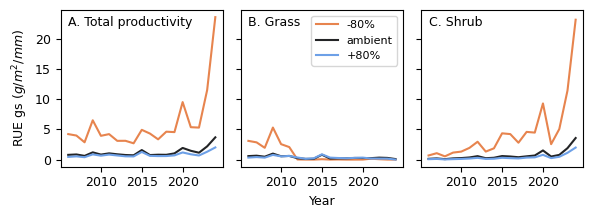

In [21]:
#def getrupper(var)
#upper = q975['biomass_total'] - means['biomass_total']

fig, ax = plt.subplots(1, 3, figsize=(6.0,2.25), sharey=True)
a1 = sns.lineplot(data=df_means, ax=ax[0], x="year", y="RUEgs_tot",
                  hue="PPT treatment", legend=False)
#get_r_ci("biomass_total", a1)

a2 = sns.lineplot(data=df_means, ax=ax[1], x="year", y="RUEgs_grass",
                  hue="PPT treatment", legend=True)
#get_r_ci("biomass_grass", a2)

a3 = sns.lineplot(data=df_means, ax=ax[2], x="year", y="RUEgs_shrub",
                  hue="PPT treatment", legend=False)
#get_r_ci("biomass_shrub", a3)

a1.set(xlabel=None)
a1.set(ylabel="RUE gs ($g/m^2/mm$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2006, 22, 'A. Total productivity' )
a2.text(2006, 22, 'B. Grass' )
a2.legend(loc=1, prop={'size': 8})
a3.text(2006, 22, 'C. Shrub' )
#a3.legend(loc=1, prop={'size': 8})
plt.tight_layout()

#plt.savefig(out_path + '/figs/fig3.jpg', dpi=400, facecolor='w')
#plt.savefig(out_path + '/figs/fig3.pdf', dpi=400, facecolor='w')